# **PART I: DATA PREPARATION**


In [1]:
import sys
import sklearn

import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving digital_letters.csv to digital_letters.csv


In [3]:
df = pd.read_csv('digital_letters.csv', index_col=[0])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E


In [4]:
# Prepare X and Y. Y is the label column, X is the rest of the column. 
Y = df.loc[:, 'label']
X = df.drop(['label'], axis=1) #dropping Y column from X

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [6]:
print(X_train.shape)
print(X_test.shape)

(9847, 784)
(3283, 784)


In [7]:
#change X_train dataframe to numpy array matrix
X_train=X_train.to_numpy()
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_train.shape[0]

9847

In [9]:
print(X_train[0][200:300])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.  48. 254. 255. 255. 255.
 109.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 184. 255. 234. 248. 255.
 137.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  63. 255. 255. 131. 239. 255.
 165.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 199. 255. 246.  23. 226. 255.
 193.   0.]


In [10]:
#change Y_train dataframe to numpy array matrix
Y_train=Y_train.to_numpy()

label = A


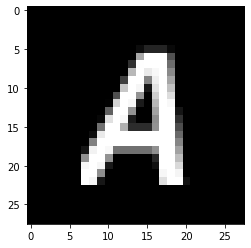

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,-1), cmap="gray")
print(f'label = {Y_train[0]}')

# **PART II: Perform PCA and inverse PCA manually with SVD**


In [12]:
# calculated mean vector 'X_mean' and 0-mean'ed X_train 'X_centered' 
X_mean = X_train.mean(axis=0)
X_centered = X_train - X_mean

print(f'shape of X_train, X_centered = {X_train.shape}')
print(f'shape of mean vector of X_train = {X_mean.shape}')

shape of X_train, X_centered = (9847, 784)
shape of mean vector of X_train = (784,)


In [13]:
num_data = X_train.shape[0]

# calculating variance-covariance matrix
covX = X_centered.T.dot(X_centered)/num_data

In [14]:
covX.shape

(784, 784)

In [15]:
# Performing PCA of X = SVD of covX
# Perform SVD on covariance matrix
U, s, Vt = np.linalg.svd(covX)

print(f' shape of U = {U.shape}')
print(f' shape of s = {s.shape}')
print(f' shape of Vt = {Vt.shape}')

# create a cov matrix S from s
m, n = X_train.shape
S = np.zeros(covX.shape)
S[:n, :n] = np.diag(s)

print(f' shape of S = {S.shape}')

 shape of U = (784, 784)
 shape of s = (784,)
 shape of Vt = (784, 784)
 shape of S = (784, 784)


## See the first 10 singular values of covX

In [16]:
# see the first 10 singular values
# This is equivalent of the first 10 eigenvalues
print(f'First 10 singular values of covX =\n {s[:10]}')


First 10 singular values of covX =
 [688634.70408582 323344.31095462 221036.69992366 171642.58705391
 127031.02130526 114496.80224673 106593.44027411  96711.33558559
  81499.66597764  77139.97592901]


## Calculation of principal component score PC



In [17]:
# principal component score Y
PC = X_centered.dot(U)
print(PC.shape)

(9847, 784)


## (Inverse PCA) Reconstruction from principal component score Y.

In [18]:
# reconstruction from PC using all principal component scores
X_reconst = PC.dot(U.T) # = PC.dot(U) since U=U^=1=U^T
print(X_reconst.shape)

(9847, 784)


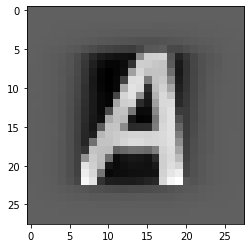

In [19]:
plt.imshow(X_reconst[0].reshape(28,-1), cmap="gray")
# this is not identical to the oritinal X_train[0]

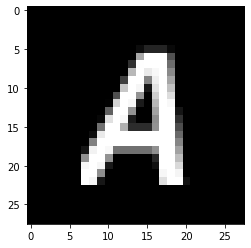

In [20]:
# We need add X_mean.
plt.imshow((X_reconst[0]+X_mean).reshape(28,-1), cmap="gray")

In [21]:
# if true, they are element-wise equal within a tolerance (1e-8+ 1e-5 * n).
# confirm correctly recovered.
np.allclose(X_reconst[0]+X_mean, X_train[0])

True

## Next, we show reconstruction with small number of principal comonents. (Inverse PCA)

In [22]:
DIM=50
PC_DIM = PC[:,:DIM] # use top DIM principal components
U_DIM = U[:,:DIM]

X_reconst_DIM= PC_DIM.dot(U_DIM.T)
print(X_reconst_DIM.shape)

(9847, 784)


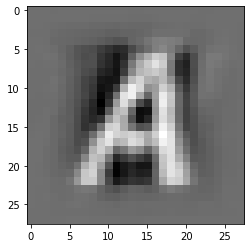

In [23]:
# We see reconstruction from top DIM components WITHOUT revert 0-mean process
plt.imshow(X_reconst_DIM[0].reshape(28,-1), cmap="gray")

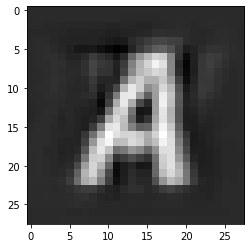

In [24]:
# We see reconstruction from top DIM components
plt.imshow((X_reconst_DIM[0]+X_mean).reshape(28,-1), cmap="gray")

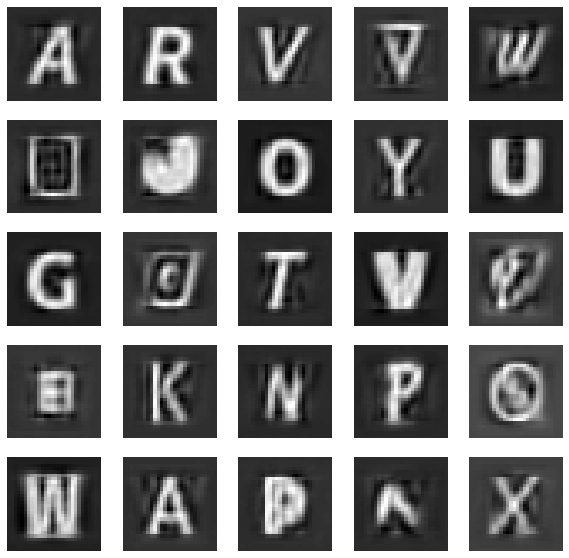

In [25]:
# visualize samples
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow((X_reconst_DIM[i]+X_mean).reshape(28,-1), cmap="gray")
    plt.axis("off")

# **PART III: PERFORM PCA WITH THIS DATASET**

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_) #cumlattive contribution

In [27]:
print(cumsum.shape)

(784,)


In [28]:
print(f' cumulative contribution in the first 100 : \n {cumsum[:101]}')

 cumulative contribution in the first 100 : 
 [0.18816787 0.27652097 0.33691875 0.3838197  0.41853064 0.44981663
 0.47894304 0.5053692  0.5276388  0.54871712 0.56716591 0.58457851
 0.59961474 0.6140397  0.62749565 0.63913835 0.65049879 0.66111118
 0.67081982 0.67971827 0.68826999 0.6962066  0.70401289 0.71154297
 0.71882323 0.72566381 0.73228402 0.73832055 0.74425229 0.74961395
 0.7548085  0.75974567 0.76451108 0.76909217 0.77360293 0.77782915
 0.78188211 0.78578395 0.78943888 0.79306291 0.79657662 0.80002703
 0.80343914 0.8067215  0.80995838 0.81305392 0.8160992  0.8190678
 0.82188688 0.82465309 0.82731602 0.82992142 0.83241794 0.83490023
 0.83730969 0.83963555 0.84191272 0.84416915 0.84641538 0.84859246
 0.85072402 0.85277378 0.85478982 0.85679381 0.85873254 0.86059169
 0.86242913 0.86420416 0.86595307 0.8676662  0.86934832 0.87095937
 0.87254714 0.87411738 0.87568101 0.87722606 0.87874022 0.88022669
 0.88170194 0.88315332 0.88454969 0.88592279 0.88727314 0.88859226
 0.88988889 0.891

In [29]:
from numpy.linalg import matrix_rank
matrix_rank(X_train)

784

In [30]:
d95 = np.argmax(cumsum >= 0.95) + 1
print(f'Top {d95} principal components preserves more than 95% of the original data (X_train).')

Top 164 principal components preserves more than 95% of the original data (X_train).


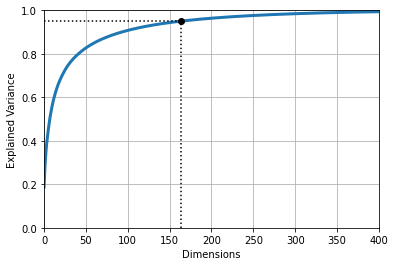

In [31]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d95, d95], [0, 0.95], "k:")
plt.plot([0, d95], [0.95, 0.95], "k:")
plt.plot(d95, 0.95, "ko")
plt.grid(True)
plt.show()

In [32]:
# Unitary matrix U ={u1, u2, ..., u784}
U_pca = pca.components_

# variance-covariance matrix 
COV_pca = pca.get_covariance()

# eigenvalue
eigenvalues = pca.explained_variance_

# principal component scores
scores = pca.transform(X_train)

In [33]:
# see the first 10 singular values vs the first 10 eigenvalues
print(f'First 10 singular values of covX =\n {s[:10]}')

print(f'First 10 eigenvalues of X =\n {eigenvalues[:10]}')

First 10 singular values of covX =
 [688634.70408582 323344.31095462 221036.69992366 171642.58705391
 127031.02130526 114496.80224673 106593.44027411  96711.33558559
  81499.66597764  77139.97592901]
First 10 eigenvalues of X =
 [688704.64464077 323377.15112433 221059.14931426 171660.01977655
 127043.92309496 114508.43100991 106604.26633954  96721.15798408
  81507.9434168   77147.81058023]


## Compress Digital Letter data into 50 dim and reconstruct.

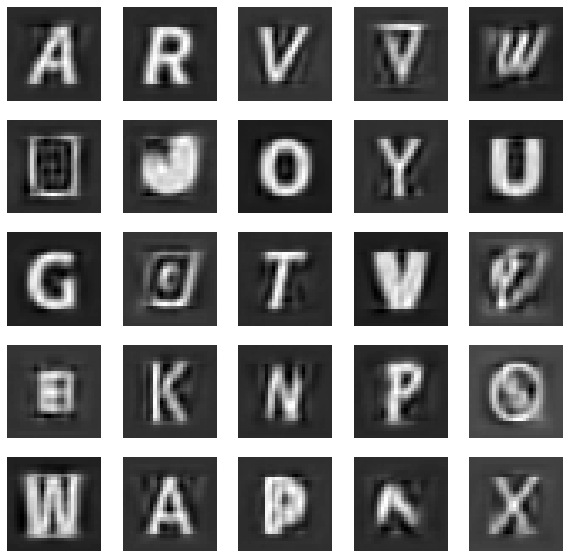

In [34]:
#DIM = 50 as defined above in SVD
pcaD = PCA(n_components=DIM)
pcaD.fit(X_train)
scoresD = pcaD.transform(X_train)
Xres = pcaD.inverse_transform(scoresD)

# visualize samples
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(Xres[i].reshape(28,-1), cmap="gray")
    plt.axis("off")

# **PART IV: PERFOM SVD ON X_CENTERED**

Calculate SVD and use dimensionality reduction to get down to 50 coordinates

In [58]:
# Calculate u, s, v
u, s1, v = np.linalg.svd(X_centered)
# Set all singular values greater than the first 50 to 0
for i in range(1, s1.shape[0]):
    s1[i] = 0
# Calculate the reduced dimensions with svd
#svd_cords = np.diag(s) @ v

# create a cov matrix S from s
m, n = X_train.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s1)

In [59]:
reconstructedX = u.dot(S).dot(v)

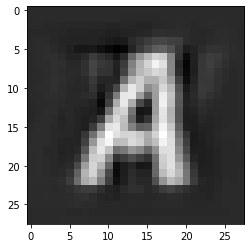

In [37]:
plt.imshow((reconstructedX[0]+X_mean).reshape(28,-1), cmap="gray")

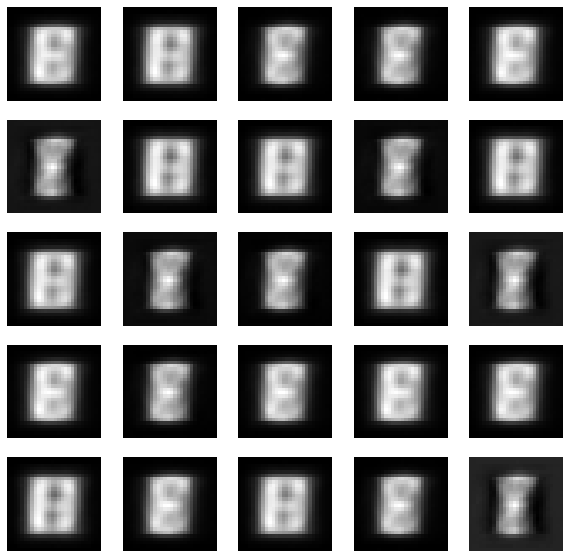

In [60]:
# visualize samples
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow((reconstructedX[i]+X_mean).reshape(28,-1), cmap="gray")
    plt.axis("off")

In [39]:
S.shape

(9847, 784)

In [40]:
s1.shape

(784,)

In [41]:
m

9847

In [42]:
SV= s1*s1/(m-1)
print(f'First 10 singular values of X_centered =\n {s1[:10]}')
print(f'\n  (singular value)^2 / (N-1)= \n  {SV[:10]}')

First 10 singular values of X_centered =
 [82346.74207965 56426.69075863 46653.49273257 41111.61094776
 35367.70372519 33577.52241788 32397.92595799 30859.62607536
 28328.91121949 27560.79358387]

  (singular value)^2 / (N-1)= 
  [688704.64464077 323377.15112433 221059.14931426 171660.01977655
 127043.92309496 114508.43100991 106604.26633954  96721.15798408
  81507.9434168   77147.81058023]
